# OSS Dublin 2022 Tutorial: **Beyond Neural Search**:
## Hands-on Building Multi-Modal Solution with Jina AI Sami Jaghouar, Jina AI

In [1]:
!pip install docarray jina diffusers transformers jina-cloud

ERROR: Could not find a version that satisfies the requirement jina-cloud (from versions: none)
ERROR: No matching distribution found for jina-cloud
You should consider upgrading via the '/home/sami/.pyenv/versions/3.9.10/bin/python3.9 -m pip install --upgrade pip' command.


### 1) docarray

#### Document

In [2]:
from docarray import Document, DocumentArray

**Document** is the basic data type in DocArray. Whether you’re working with text, image, video, audio, 3D meshes or the nested or the combined of them, you can always represent them as Document

In [3]:
Document(text='hello world')

📄 Document: 790dda39e20a324069b04e90c0492bbc
╭────────────────────────────────────┬─────────────────────────────────────────╮
│ Attribute                          │ Value                                   │
├────────────────────────────────────┼─────────────────────────────────────────┤
│ text                               │ hello world                             │
╰────────────────────────────────────┴─────────────────────────────────────────╯

You can store all kind of data (i.e different modality) and use a similar interface for your multimodality workload

In [4]:
img_uri = 'https://d1rytvr7gmk1sx.cloudfront.net/wp-content/uploads/2021/08/tux.jpg'

In [5]:
doc = Document(
    uri='https://d1rytvr7gmk1sx.cloudfront.net/wp-content/uploads/2021/08/tux.jpg'
)
doc

📄 Document: b0153e7691f9dcba4ffd419d7993ccbf
╭───────────┬──────────────────────────────────────────────────────────────────╮
│ Attribute │ Value                                                            │
├───────────┼──────────────────────────────────────────────────────────────────┤
│ mime_type │ image/jpeg                                                       │
│ uri       │ https://d1rytvr7gmk1sx.cloudfront.net/wp-content/uploads/2021/0… │
╰───────────┴──────────────────────────────────────────────────────────────────╯

In [6]:
doc.load_uri_to_image_tensor()
doc

📄 Document: b0153e7691f9dcba4ffd419d7993ccbf
╭───────────┬──────────────────────────────────────────────────────────────────╮
│ Attribute │ Value                                                            │
├───────────┼──────────────────────────────────────────────────────────────────┤
│ tensor    │ <class 'numpy.ndarray'> in shape (900, 743, 3), dtype: uint8     │
│ mime_type │ image/jpeg                                                       │
│ uri       │ https://d1rytvr7gmk1sx.cloudfront.net/wp-content/uploads/2021/0… │
╰───────────┴──────────────────────────────────────────────────────────────────╯

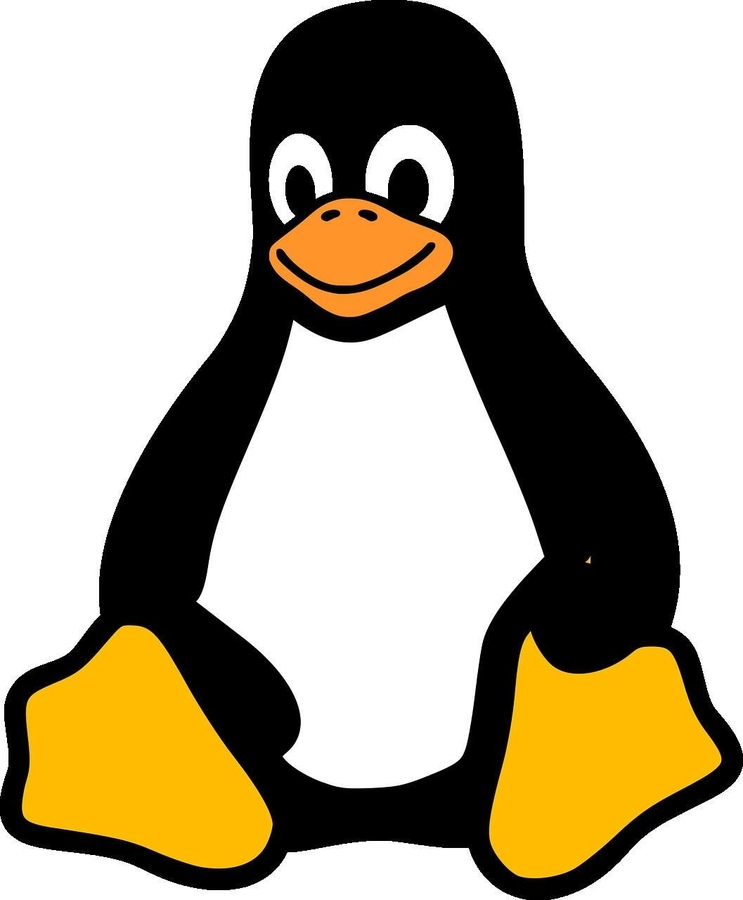

In [7]:
doc.display(from_='tensor')

In [8]:
doc.tensor.shape

(900, 743, 3)

You can add tags as well to your data

In [9]:
Document(text='hello world', tags={'event': 'oss_dublin'})

📄 Document: 031e8ca82f4dd593a3861caa03497376
╭────────────────────────┬─────────────────────────────────────────────────────╮
│ Attribute              │ Value                                               │
├────────────────────────┼─────────────────────────────────────────────────────┤
│ text                   │ hello world                                         │
│ tags                   │ {'event': 'oss_dublin'}                             │
╰────────────────────────┴─────────────────────────────────────────────────────╯

#### DocumentArray

DocumentArray is a list-like container of Document objects. It is the best way when working with multiple Documents

In [10]:
da = DocumentArray([Document(uri=img_uri)] * 12)

In [11]:
da

╭────────────────── Documents Summary ──────────────────╮
│                                                       │
│   Type                   DocumentArrayInMemory        │
│   Length                 12                           │
│   Homogenous Documents   True                         │
│   Common Attributes      ('id', 'mime_type', 'uri')   │
│   Multimodal dataclass   False                        │
│                                                       │
╰───────────────────────────────────────────────────────╯
╭───────────────────── Attributes Summary ─────────────────────╮
│                                                              │
│   Attribute   Data type   #Unique values   Has empty value   │
│  ──────────────────────────────────────────────────────────  │
│   id          ('str',)    1                False             │
│   mime_type   ('str',)    1                False             │
│   uri         ('str',)    1                False             │
│                                                              │
╰──────────────────────────────────────────────────────────────╯

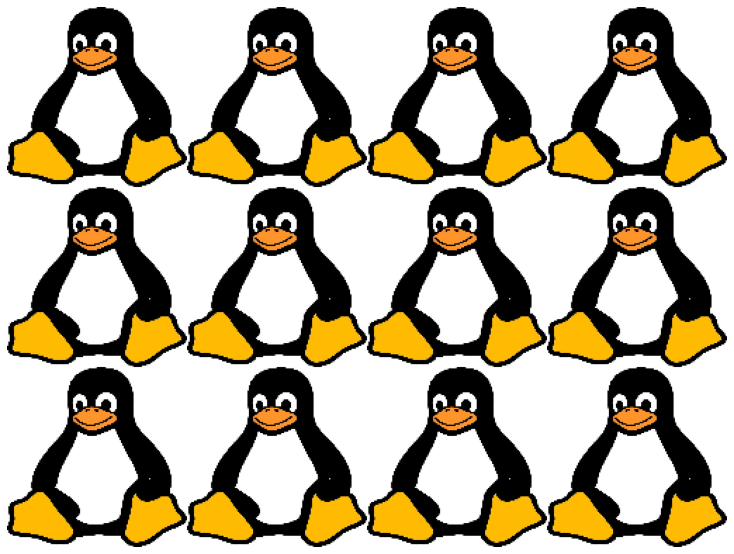

In [12]:
da.plot_image_sprites()

## Jina 

In [13]:
from jina import Executor, Flow, requests

Executor is a self-contained component and performs a group of tasks on a DocumentArray.
You can create an Executor by extending the Executor class and adding logic to endpoint methods

In [14]:
class MyExecutor(Executor):
    @requests(on='/')
    def foo(self, docs: DocumentArray, **kwargs):
        pass
        for doc_ in docs:
            doc_.text += 'jina is fully open source'

A Flow orchestrates Executors into a processing pipeline to build a multi-modal/cross-modal application. Documents “flow” through the created pipeline and are processed by Executors.

You can think of Flow as an interface to configure and launch your microservice architecture, while the heavy lifting is done by the services themselves. In particular, each Flow also launches a Gateway service, which can expose all other services through an API that you define

In [15]:
with Flow().add(uses=MyExecutor) as f:
    docs = f.post(on='/', inputs=[Document(text='')])

Output()

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/sami/.pyenv/versions/3.9.10/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/sami/.pyenv/versions/3.9.10/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/sami/.pyenv/versions/3.9.10/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/sami/.pyenv/versions/3.9.10/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/sami/.pyenv/versions/3.9.10/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/sami/.pyenv/versions/3.9.10/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/sami/.pyenv/versions/3.9.10/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/sami/.pyenv/versions/3.9.10/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/sami/.pyenv/versions/3.9.10/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/sami/.pyenv/versions/3.9.10/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/sami/.pyenv/versions/3.9.10/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/sami/.pyenv/versions/3.9.10/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/sami/.pyenv/versions/3.9.10/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/sami/.pyenv/versions/3.9.10/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/sami/.pyenv/versions/3.9.10/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/sami/.pyenv/versions/3.9.10/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/sami/.pyenv/versions/3.9.10/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/sami/.pyenv/versions/3.9.10/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/sami/.pyenv/versions/3.9.10/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/sami/.pyenv/versions/3.9.10/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/sami/.pyenv/versions/3.9.10/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/sami/.pyenv/versions/3.9.10/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/sami/.pyenv/versions/3.9.10/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/sami/.pyenv/versions/3.9.10/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/sami/.pyenv/versions/3.9.10/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/sami/.pyenv/versions/3.9.10/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

─────────────────────────────────────────── 🎉 Flow is ready to serve! ────────────────────────────────────────────
╭────────────── 🔗 Endpoint ───────────────╮
│  ⛓     Protocol                    GRPC  │
│  🏠       Local           ]8;id=148183;grpc://0.0.0.0:61471\0.0.0.0]8;;\]8;id=891538;grpc://0.0.0.0:61471\:]8;;\]8;id=916625;grpc://0.0.0.0:61471\61471]8;;\  │
│  🔒     Private      ]8;id=929824;grpc://172.31.45.19:61471\172.31.45.19]8;;\]8;id=895350;grpc://172.31.45.19:61471\:]8;;\]8;id=859653;grpc://172.31.45.19:61471\61471]8;;\  │
│  🌍      Public    ]8;id=638231;grpc://89.100.169.154:61471\89.100.169.154]8;;\]8;id=916921;grpc://89.100.169.154:61471\:]8;;\]8;id=965470;grpc://89.100.169.154:61471\61471]8;;\  │
╰──────────────────────────────────────────╯

In [16]:
docs[0].text

'jina is fully open source'

A Flow can actually be any kind of Directed Acyclic Graph

In [17]:
Flow().add(uses=MyExecutor).add(uses=MyExecutor)

In [18]:
Flow().add(name='exec1', uses=MyExecutor).add(
    name='exec2', uses=MyExecutor, needs=['gateway']
).add(needs=['exec1' , 'exec2'])

## Stable Diffusion with Jina